<a href="https://colab.research.google.com/github/Nishant-8009/DL/blob/main/Lec2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Imports
import torch
import torchvision
from torchvision.datasets import MNIST

In [ ]:
# Download training dataset
dataset = MNIST(root='data/', download=True)

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 9.91M/9.91M [00:00<00:00, 109MB/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 28.9k/28.9k [00:00<00:00, 25.2MB/s]

Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 1.65M/1.65M [00:00<00:00, 49.6MB/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw

Failed to download (trying next):
HTTP Error 403: Forbidden



100%|██████████| 4.54k/4.54k [00:00<00:00, 6.51MB/s]

Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



In [ ]:
len(dataset)

60000

In [ ]:
test_dataset = MNIST(root='data/', train=False)
len(test_dataset)

10000

In [ ]:
dataset[0]

(<PIL.Image.Image image mode=L size=28x28>, 5)

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

Label: 3


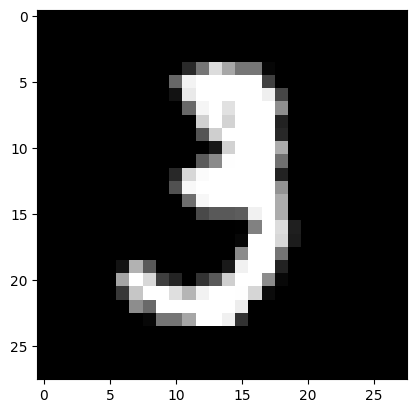

In [ ]:
image, label = dataset[10]
plt.imshow(image, cmap="gray")
print('Label:', label)

In [ ]:
import torchvision.transforms as transforms

In [ ]:
# MNIST dataset (images and labels)
dataset = MNIST(root='data/',
                train=True,
                transform=transforms.ToTensor())

In [ ]:
img_tensor, label = dataset[10]
print(img_tensor.shape, label)

torch.Size([1, 28, 28]) 3


The image is now converted to a 1x28x28 tensor. The first dimension tracks color channels. The second and third dimensions represent pixels along the height and width of the image, respectively. Since images in the MNIST dataset are grayscale, there's just one channel. Other datasets have images with color, in which case there are three channels: red, green, and blue (RGB).

In [ ]:
print(img_tensor[0,10:15,10:15])
print(torch.max(img_tensor), torch.min(img_tensor))

tensor([[0.0000, 0.0000, 0.0000, 0.0941, 0.8196],
        [0.0000, 0.0000, 0.3569, 0.5373, 0.9922],
        [0.1569, 0.8392, 0.9804, 0.9961, 0.9961],
        [0.3176, 0.9686, 0.9961, 0.9961, 0.9961],
        [0.0000, 0.4314, 0.9647, 0.9961, 0.9961]])
tensor(0.9961) tensor(0.)


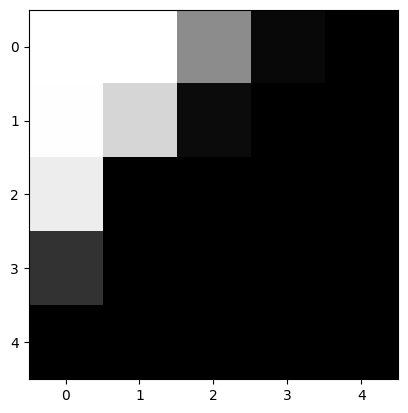

In [ ]:
# Plot the image by passing in the 28x28 matrix
plt.imshow(img_tensor[0,20:25,15:20], cmap='gray');

In [ ]:
from torch.utils.data import random_split

train_ds, val_ds = random_split(dataset, [50000, 10000])
len(train_ds), len(val_ds)

(50000, 10000)

In [ ]:
from torch.utils.data import DataLoader

batch_size = 125

train_loader = DataLoader(train_ds, batch_size, shuffle=True)
val_loader = DataLoader(val_ds, batch_size)

In [ ]:
import torch.nn as nn

input_size = 1*28*28
num_classes = 10

# Logistic regression model
model = nn.Linear(input_size, num_classes)

In [ ]:
list(model.parameters())

[Parameter containing:
 tensor([[-0.0303,  0.0241,  0.0338,  ..., -0.0280,  0.0235,  0.0175],
         [-0.0213, -0.0160, -0.0261,  ...,  0.0196,  0.0075,  0.0302],
         [ 0.0245, -0.0236,  0.0071,  ...,  0.0185,  0.0264,  0.0175],
         ...,
         [-0.0146, -0.0194, -0.0069,  ..., -0.0059, -0.0208, -0.0266],
         [ 0.0321,  0.0193,  0.0049,  ..., -0.0272, -0.0044, -0.0158],
         [ 0.0307, -0.0119,  0.0105,  ..., -0.0329,  0.0215, -0.0125]],
        requires_grad=True),
 Parameter containing:
 tensor([-0.0009, -0.0248, -0.0119,  0.0059,  0.0318,  0.0126,  0.0168, -0.0032,
         -0.0167,  0.0128], requires_grad=True)]

In [ ]:
model.weight.shape

torch.Size([10, 784])

In [ ]:
for images, labels in train_loader:
    print(labels)
    print(images.shape)
    outputs = model(images)
    print(outputs)
    break

tensor([1, 7, 1, 3, 0, 1, 8, 3, 7, 1, 6, 6, 7, 0, 8, 6, 6, 6, 3, 6, 5, 3, 1, 7,
        9, 9, 1, 1, 3, 3, 3, 7, 4, 7, 8, 9, 0, 5, 4, 3, 7, 6, 0, 1, 7, 6, 2, 8,
        6, 7, 4, 8, 9, 1, 4, 7, 6, 9, 8, 2, 5, 3, 1, 6, 0, 8, 2, 5, 4, 1, 1, 1,
        6, 0, 4, 2, 8, 2, 6, 4, 6, 6, 7, 6, 5, 2, 3, 7, 1, 6, 4, 7, 8, 0, 3, 1,
        4, 0, 0, 4, 9, 8, 6, 8, 6, 4, 0, 9, 1, 5, 6, 3, 7, 8, 2, 9, 4, 8, 3, 7,
        9, 4, 6, 0, 7])
torch.Size([125, 1, 28, 28])


RuntimeError: mat1 and mat2 shapes cannot be multiplied (3500x28 and 784x10)

In [ ]:
images.shape

torch.Size([125, 1, 28, 28])

We must have to flatten the image vectors

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

model = MnistModel()

In [ ]:
model.linear

Linear(in_features=784, out_features=10, bias=True)

In [ ]:
for images, labels in train_loader:
    print(images.shape)
    outputs = model(images)
    break

print('outputs.shape : ', outputs.shape)
print('Sample outputs :\n', outputs[:2].data)

torch.Size([125, 1, 28, 28])
outputs.shape :  torch.Size([125, 10])
Sample outputs :
 tensor([[-0.1088, -0.0518, -0.0927,  0.2139,  0.3106,  0.1237, -0.1557,  0.3128,
         -0.0419,  0.0275],
        [ 0.3457,  0.0638,  0.1516,  0.0160,  0.2213, -0.1918,  0.0175,  0.2670,
         -0.1406, -0.0682]])


In [ ]:
import torch.nn.functional as F

In [ ]:
# Apply softmax for each output row
probs = F.softmax(outputs, dim=1)

# Look at sample probabilities
print("Sample probabilities:\n", probs[:2].data)

# Add up the probabilities of an output row
print("Sum: ", torch.sum(probs[1]).item())

Sample probabilities:
 tensor([[0.0838, 0.0887, 0.0852, 0.1157, 0.1275, 0.1057, 0.0800, 0.1278, 0.0896,
         0.0960],
        [0.1301, 0.0982, 0.1072, 0.0936, 0.1149, 0.0760, 0.0937, 0.1203, 0.0800,
         0.0860]])
Sum:  0.9999999403953552


In [ ]:
max_probs, preds = torch.max(probs, dim=1)
print(preds)
print(max_probs)

tensor([7, 0, 7, 9, 7, 3, 0, 5, 7, 4, 0, 4, 4, 7, 1, 7, 3, 3, 3, 7, 3, 3, 4, 0,
        3, 4, 9, 4, 1, 7, 2, 7, 7, 4, 0, 3, 4, 3, 7, 7, 7, 0, 4, 0, 7, 7, 4, 1,
        7, 4, 3, 3, 4, 9, 7, 3, 5, 7, 7, 4, 3, 3, 0, 7, 4, 3, 3, 3, 6, 1, 1, 4,
        7, 3, 7, 0, 4, 6, 5, 6, 3, 7, 3, 7, 7, 3, 7, 0, 1, 3, 7, 7, 0, 4, 7, 3,
        0, 3, 7, 3, 0, 1, 3, 0, 3, 7, 6, 4, 1, 3, 6, 1, 3, 3, 7, 3, 7, 0, 4, 0,
        7, 7, 7, 0, 3])
tensor([0.1278, 0.1301, 0.1273, 0.1175, 0.1291, 0.1372, 0.1286, 0.1241, 0.1461,
        0.1231, 0.1152, 0.1286, 0.1468, 0.1292, 0.1321, 0.1345, 0.1333, 0.1353,
        0.1181, 0.1279, 0.1277, 0.1366, 0.1316, 0.1123, 0.1496, 0.1480, 0.1225,
        0.1313, 0.1261, 0.1423, 0.1273, 0.1259, 0.1457, 0.1535, 0.1313, 0.1506,
        0.1411, 0.1568, 0.1327, 0.1508, 0.1331, 0.1412, 0.1221, 0.1372, 0.1268,
        0.1137, 0.1457, 0.1247, 0.1291, 0.1405, 0.1315, 0.1700, 0.1275, 0.1177,
        0.1317, 0.1234, 0.1235, 0.1591, 0.1440, 0.1307, 0.1286, 0.1486, 0.1293,
        0.1540, 

In [ ]:
torch.sum(preds == labels)

tensor(9)

In [ ]:
len(preds)

125

In [ ]:
def accuracy(outputs, labels):
    _, preds = torch.max(outputs, dim=1)
    return torch.tensor(torch.sum(preds == labels).item() / len(preds))

In [ ]:
accuracy(outputs, labels)

tensor(0.0720)

Accuracy is an excellent way for us (humans) to evaluate the model. However, we can't use it as a loss function for optimizing our model using gradient descent for the following reasons:

1. It's not a differentiable function. `torch.max` and `==` are both non-continuous and non-differentiable operations, so we can't use the accuracy for computing gradients w.r.t the weights and biases.

2. It doesn't take into account the actual probabilities predicted by the model, so it can't provide sufficient feedback for incremental improvements.

For these reasons, accuracy is often used as an **evaluation metric** for classification, but not as a loss function. A commonly used loss function for classification problems is the **cross-entropy**, which has the following formula:

![cross-entropy](https://i.imgur.com/VDRDl1D.png)

While it looks complicated, it's actually quite simple:

* For each output row, pick the predicted probability for the correct label. E.g., if the predicted probabilities for an image are `[0.1, 0.3, 0.2, ...]` and the correct label is `1`, we pick the corresponding element `0.3` and ignore the rest.

* Then, take the [logarithm](https://en.wikipedia.org/wiki/Logarithm) of the picked probability. If the probability is high, i.e., close to 1, then its logarithm is a very small negative value, close to 0. And if the probability is low (close to 0), then the logarithm is a very large negative value. We also multiply the result by -1, which results is a large postive value of the loss for poor predictions.

![](https://www.intmath.com/blog/wp-content/images/2019/05/log10.png)

* Finally, take the average of the cross entropy across all the output rows to get the overall loss for a batch of data.

Unlike accuracy, cross-entropy is a continuous and differentiable function. It also provides useful feedback for incremental improvements in the model (a slightly higher probability for the correct label leads to a lower loss). These two factors make cross-entropy a better choice for the loss function.

As you might expect, PyTorch provides an efficient and tensor-friendly implementation of cross-entropy as part of the `torch.nn.functional` package. Moreover, it also performs softmax internally, so we can directly pass in the model's outputs without converting them into probabilities.

In [ ]:
loss_fn = F.cross_entropy

In [ ]:
# Loss for current batch of data
loss = loss_fn(outputs, labels)
print(loss)

tensor(2.3546, grad_fn=<NllLossBackward0>)


Training model

for epoch in range(num_epochs):
    # Training phase
    for batch in train_loader:
        # Generate predictions
        # Calculate loss
        # Compute gradients
        # Update weights
        # Reset gradients
    
    # Validation phase
    for batch in val_loader:
        # Generate predictions
        # Calculate loss
        # Calculate metrics (accuracy etc.)
    # Calculate average validation loss & metrics
    
    # Log epoch, loss & metrics for inspection

In [ ]:
def fit(epochs, lr, model, train_loader, val_loader, opt_func=torch.optim.SGD):
    optimizer = opt_func(model.parameters(), lr)
    history = [] # for recording epoch-wise results

    for epoch in range(epochs):

        # Training Phase
        for batch in train_loader:
            loss = model.training_step(batch)
            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        # Validation phase
        result = evaluate(model, val_loader)
        model.epoch_end(epoch, result)
        history.append(result)

    return history

In [ ]:
def evaluate(model, val_loader):
    outputs = [model.validation_step(batch) for batch in val_loader]
    return model.validation_epoch_end(outputs)

In [ ]:
class MnistModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.linear = nn.Linear(input_size, num_classes)

    def forward(self, xb):
        xb = xb.reshape(-1, 784)
        out = self.linear(xb)
        return out

    def training_step(self, batch):
        images, labels = batch
        out = self(images)                  # Generate predictions
        loss = F.cross_entropy(out, labels) # Calculate loss
        return loss

    def validation_step(self, batch):
        images, labels = batch
        out = self(images)                    # Generate predictions
        loss = F.cross_entropy(out, labels)   # Calculate loss
        acc = accuracy(out, labels)           # Calculate accuracy
        return {'val_loss': loss, 'val_acc': acc}

    def validation_epoch_end(self, outputs):
        batch_losses = [x['val_loss'] for x in outputs]
        epoch_loss = torch.stack(batch_losses).mean()   # Combine losses
        batch_accs = [x['val_acc'] for x in outputs]
        epoch_acc = torch.stack(batch_accs).mean()      # Combine accuracies
        return {'val_loss': epoch_loss.item(), 'val_acc': epoch_acc.item()}

    def epoch_end(self, epoch, result):
        print("Epoch [{}], val_loss: {:.4f}, val_acc: {:.4f}".format(epoch, result['val_loss'], result['val_acc']))

model = MnistModel()

In [ ]:
result0 = evaluate(model, val_loader)
result0

{'val_loss': 2.341701030731201, 'val_acc': 0.07649999111890793}

In [ ]:
history1 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.9630, val_acc: 0.6067
Epoch [1], val_loss: 1.6847, val_acc: 0.7241
Epoch [2], val_loss: 1.4779, val_acc: 0.7588
Epoch [3], val_loss: 1.3229, val_acc: 0.7775
Epoch [4], val_loss: 1.2048, val_acc: 0.7917


In [ ]:
history2 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 1.1125, val_acc: 0.8002
Epoch [1], val_loss: 1.0389, val_acc: 0.8095
Epoch [2], val_loss: 0.9790, val_acc: 0.8165
Epoch [3], val_loss: 0.9292, val_acc: 0.8217
Epoch [4], val_loss: 0.8873, val_acc: 0.8261


In [ ]:
history3 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.8514, val_acc: 0.8297
Epoch [1], val_loss: 0.8204, val_acc: 0.8341
Epoch [2], val_loss: 0.7933, val_acc: 0.8375
Epoch [3], val_loss: 0.7693, val_acc: 0.8396
Epoch [4], val_loss: 0.7480, val_acc: 0.8416


In [ ]:
history4 = fit(5, 0.001, model, train_loader, val_loader)

Epoch [0], val_loss: 0.7289, val_acc: 0.8447
Epoch [1], val_loss: 0.7117, val_acc: 0.8472
Epoch [2], val_loss: 0.6961, val_acc: 0.8503
Epoch [3], val_loss: 0.6819, val_acc: 0.8509
Epoch [4], val_loss: 0.6688, val_acc: 0.8528


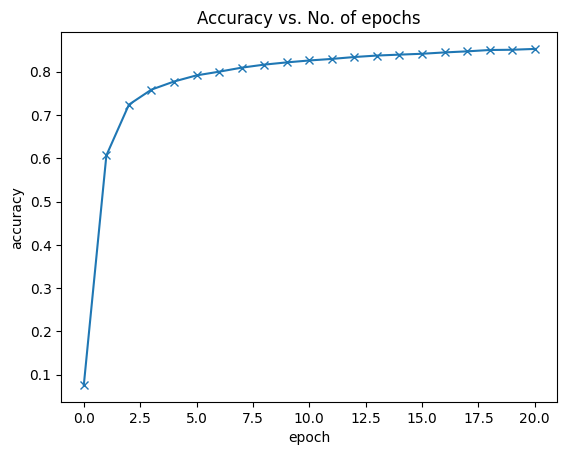

In [ ]:
history = [result0] + history1 + history2 + history3 + history4
accuracies = [result['val_acc'] for result in history]
plt.plot(accuracies, '-x')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.title('Accuracy vs. No. of epochs');

In [ ]:
# Define test dataset
test_dataset = MNIST(root='data/',
                     train=False,
                     transform=transforms.ToTensor())

Shape: torch.Size([1, 28, 28])
Label: 7


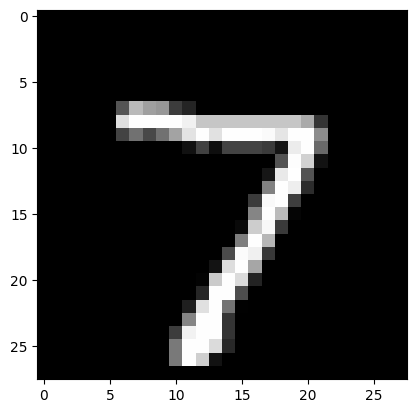

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Shape:', img.shape)
print('Label:', label)

In [ ]:
def predict_image(img, model):
    xb = img.unsqueeze(0)
    yb = model(xb)
    _, preds = torch.max(yb, dim=1)
    return preds[0].item()

Label: 7 , Predicted: 7


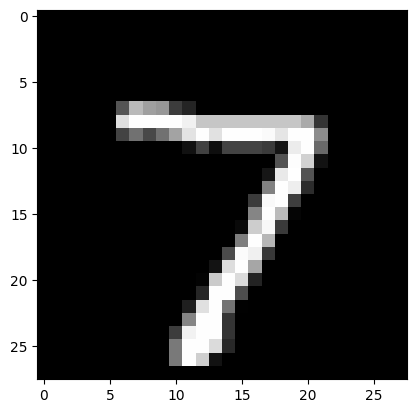

In [ ]:
img, label = test_dataset[0]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

Label: 4 , Predicted: 4


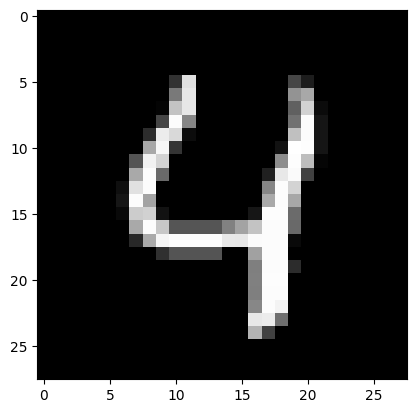

In [ ]:
img, label = test_dataset[4]
plt.imshow(img[0], cmap='gray')
print('Label:', label, ', Predicted:', predict_image(img, model))

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model, test_loader)
result

{'val_loss': 0.6369503140449524, 'val_acc': 0.8597656488418579}

In [ ]:
torch.save(model.state_dict(), 'mnist-logistic.pth')

In [ ]:
model.state_dict()

OrderedDict([('linear.weight',
              tensor([[ 0.0291,  0.0130, -0.0172,  ..., -0.0316,  0.0295, -0.0256],
                      [ 0.0099,  0.0108, -0.0076,  ...,  0.0353, -0.0155,  0.0194],
                      [-0.0184,  0.0096,  0.0077,  ..., -0.0120,  0.0035,  0.0302],
                      ...,
                      [ 0.0208,  0.0231,  0.0259,  ..., -0.0266,  0.0143,  0.0015],
                      [-0.0169, -0.0331, -0.0029,  ...,  0.0139,  0.0333, -0.0192],
                      [-0.0319,  0.0016, -0.0080,  ..., -0.0036, -0.0128, -0.0347]])),
             ('linear.bias',
              tensor([-0.0633,  0.0650, -0.0434, -0.0119, -0.0051,  0.0307,  0.0118,  0.0558,
                      -0.0564,  0.0239]))])

In [ ]:
model2 = MnistModel()

In [ ]:
model2.state_dict()

OrderedDict([('linear.weight',
              tensor([[-0.0091, -0.0352,  0.0070,  ..., -0.0261,  0.0234,  0.0061],
                      [-0.0114, -0.0118,  0.0348,  ...,  0.0323,  0.0001,  0.0006],
                      [-0.0317,  0.0032, -0.0248,  ..., -0.0334,  0.0356, -0.0032],
                      ...,
                      [-0.0263,  0.0060, -0.0114,  ..., -0.0065, -0.0273,  0.0348],
                      [-0.0339, -0.0268, -0.0267,  ..., -0.0285, -0.0148,  0.0142],
                      [-0.0278,  0.0058,  0.0311,  ...,  0.0187, -0.0357, -0.0274]])),
             ('linear.bias',
              tensor([ 0.0179,  0.0014,  0.0257,  0.0336, -0.0173, -0.0317,  0.0323, -0.0254,
                       0.0082, -0.0339]))])

In [ ]:
evaluate(model2, test_loader)

{'val_loss': 2.3034636974334717, 'val_acc': 0.07998047024011612}

In [ ]:
model2.load_state_dict(torch.load('mnist-logistic.pth'))
model2.state_dict()

<ipython-input-67-6cae89ea314f>:1: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model2.load_state_dict(torch.load('mnist-logistic.pth'))


OrderedDict([('linear.weight',
              tensor([[ 0.0291,  0.0130, -0.0172,  ..., -0.0316,  0.0295, -0.0256],
                      [ 0.0099,  0.0108, -0.0076,  ...,  0.0353, -0.0155,  0.0194],
                      [-0.0184,  0.0096,  0.0077,  ..., -0.0120,  0.0035,  0.0302],
                      ...,
                      [ 0.0208,  0.0231,  0.0259,  ..., -0.0266,  0.0143,  0.0015],
                      [-0.0169, -0.0331, -0.0029,  ...,  0.0139,  0.0333, -0.0192],
                      [-0.0319,  0.0016, -0.0080,  ..., -0.0036, -0.0128, -0.0347]])),
             ('linear.bias',
              tensor([-0.0633,  0.0650, -0.0434, -0.0119, -0.0051,  0.0307,  0.0118,  0.0558,
                      -0.0564,  0.0239]))])

In [ ]:
test_loader = DataLoader(test_dataset, batch_size=256)
result = evaluate(model2, test_loader)
result

{'val_loss': 0.6369503140449524, 'val_acc': 0.8597656488418579}